In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Numerical Methods to Find Roots

1. Bisection Method
2. Regula Falsi Method
3. Secant Method
4. Newton Ramphson Method
5. Brent's Method
6. Halley's Method
7. Muller's Method

### 1. Bisection Method

In [2]:
def bisection_method(f, tol=1e-6, max_iter=100):
    value_a = []
    value_b = []
    
    for i in range(-10,11):
        if f(i) < 0:
            value_a.append(i)
        elif f(i) > 0:
            value_b.append(i)

    if not value_a or not value_b:
        raise ValueError("Couldn't find a valid interval where f(a) and f(b) have opposite signs.")

    a = max(value_a, key=lambda x: -abs(x)) 
    b = min(value_b, key=lambda x: abs(x)) 

    ini_a = a
    ini_b = b

    # print('value taken for a:',value_a)
    # print('value taken for b:',value_b)
    
    if f(a) * f(b) >= 0:
        raise ValueError('The values must be one negative and one positive')

    iterations = []
    values = []

    for i in range(max_iter):
        c = (a+b)/2.0
        iterations.append(i)
        values.append(c)

        if abs(f(c)) < tol or (b-a)/2 < tol:
            return c, iterations, values, ini_a, ini_b

        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return c, iterations, values, ini_a, ini_b

In [3]:
f = lambda x: x**2 - 4*x + 3
bisection_root, bisection_iterations, bisection_values, ini_a, ini_b = bisection_method(f)
print("Root found:", bisection_root)
print('Iterations:', len(bisection_iterations))
print(ini_a, ini_b)
print(bisection_values)

Root found: 1.0
Iterations: 1
2 0
[1.0]


In [4]:
import matplotlib.pyplot as plt

def bisection_plot(f, ax):
    bisection_root, bisection_iterations, bisection_values, initial_val_a, initial_val_b = bisection_method(f)
    # print("Root found:", bisection_root)
    # print('Iterations:', len(bisection_iterations))
    ax.plot(bisection_iterations, bisection_values, marker='o', linestyle='-', label=f'Root: {bisection_root:.6f}')
    ax.set_xlabel(f'Iteration - Initial Values: {initial_val_a, initial_val_b}')
    ax.set_ylabel('Approximate Root')
    ax.set_title('Bisection Method Convergence')
    ax.grid(True)
    ax.legend(loc="upper right", title=f"Iterations: {len(bisection_iterations)}")
    # plt.show()
    
# bisection_plot(f_numeric)

### 2. Regula Falsi Method

In [5]:
def regula_falsi_method(f,max_iter=100, tol=1e-6):

    value_a = []
    value_b = []
    
    for i in range(-5,5):
        if f(i) < 0:
            value_a.append(i)
        elif f(i) > 0:
            value_b.append(i)

    if not value_a or not value_b:
        raise ValueError("Couldn't find a valid interval where f(a) and f(b) have opposite signs.")

    a = max(value_a) 
    b = max(value_b)

    ini_a = a
    ini_b = b

    # print('value taken for a:',value_a)
    # print('value taken for b:',value_b)
        
    if f(a) * f(b) >= 0:
        raise ValueError('The values must be one negative and one positive')
    
    iterations = []
    values = []

    for i in range(max_iter):
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))
        iterations.append(i)
        values.append(c)
        
        if abs(f(c)) < tol or (b-a)/2 < tol:
            return c, iterations, values, ini_a, ini_b

        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return c, iterations, values, ini_a, ini_b

In [6]:
f = lambda x: x**3 - 2*x - 5
root, iterations, values, ini_a, ini_b = regula_falsi_method(f)
print("Root found:", root)
print('Iterations:', len(iterations))
print('Intials:', ini_a, ini_b)
print('Values', values)

Root found: 2.094551401881983
Iterations: 26
Intials: 2 4
Values [2.0384615384615383, 2.0615125105425918, 2.075172723284598, 2.08321354252924, 2.087927790345771, 2.09068523481637, 2.092295898266751, 2.093235955174138, 2.0937843582153826, 2.094104193762028, 2.0942906961019734, 2.0943994391279155, 2.0944628399617238, 2.0944998036058915, 2.0945213535713716, 2.0945339171599167, 2.0945412416620064, 2.0945455117902836, 2.094548001236858, 2.09454945256013, 2.094550298666946, 2.09455079193847, 2.0945510795105964, 2.094551247162107, 2.094551344901157, 2.094551401881983]


In [7]:
def regula_falsi_plot(f, ax):
    root, iterations, values, ini_a, ini_b = regula_falsi_method(f)
    # print("Root found:", root)
    # print('Iterations:', len(iterations))
    ax.plot(iterations, values, marker='o', linestyle='-', label=f'Root: {root:.6f}')
    ax.set_xlabel(f'Iteration: Initial Value {ini_a, ini_b}')
    ax.set_ylabel('Approximate Root')
    ax.set_title('Regula Falsi Method Convergence')
    ax.grid(True)
    ax.legend(loc="upper right", title=f"Iterations: {len(iterations)}")
    # plt.show()
# regula_falsi_plot(f_numeric)

### 3. Secant Method

Unlike Regula Falsi, the Secant Method does not require f(a) and f(b) to have opposite signs.

In [8]:
import random

def secant_method(f, max_iter=100, tol=1e-6):
    iterations = []
    values = []
    
    num_samples = 20
    sample_range = (-10, 10) 
    sample_points = np.linspace(sample_range[0], sample_range[1], num_samples)
    
    sample_points = np.round(sample_points).astype(int) 
    sample_points = np.unique(sample_points) 
    
    function_values = np.abs(f(sample_points))  
    
    best_indices = np.argsort(function_values)[:2]
    a, b = sample_points[best_indices]

    ini_a = a
    ini_b = b
    
    for i in range(max_iter):
        c = b - (f(b) * (b - a)) / (f(b) - f(a))
        
        if abs(f(b)) < tol:
            return b, iterations, values, ini_a, ini_b  

        iterations.append(i)
        values.append(c)

        if abs(c - b) < tol:
            return c, iterations, values, ini_a, ini_b 

        a = b
        b = c

    return c, iterations, values, ini_a, ini_b  

In [9]:
# f = f_numeric
# root, iterations, values = secant_method(f)
# print("Root found:", root)
# print('Iterations:', len(iterations))
# print('Values:', values)

In [10]:
def sceant_plot(f, ax):
    root, iterations, values, ini_a, ini_b = secant_method(f)
    # print("Root found:", root)
    # print('Iterations:', len(iterations))
    ax.plot(iterations, values, marker='o', linestyle='-', label=f'Root: {root:.6f}')
    ax.set_xlabel(f'Iteration: Initial Value {ini_a, ini_b }')
    ax.set_ylabel('Approximate Root')
    ax.grid(True)
    ax.set_title('Secant Method Convergence')
    ax.legend(loc="upper right", title=f"Iterations: {len(iterations)}")

### 4. Newton Ramphson Method

In [11]:
from sympy import symbols, diff, lambdify
import random

def newton_raphson_method(f, max_iter=100, tol=1e-6):
    # differentiating the f(x)
    x = symbols('x')  
    f_prime = diff(f, x) 
    # Converting the symbolic functions to numerical functions
    f = lambdify(x, f, "numpy")
    df = lambdify(x, f_prime, "numpy")

    best_x0 = None
    best_f_value = float('inf')

    for _ in range(10):
        x0_candidate = random.randint(-5, 5)
        while x0_candidate ==0: 
            x0_candidate = random.randint(-5, 5)
        f_value = abs(f(x0_candidate))

        if f_value < best_f_value:
            best_f_value = f_value
            best_x0 = x0_candidate

    x0 = best_x0

    iterations = []
    values = []

    for i in range(max_iter):
        f_x0 = f(x0)
        df_x0 = df(x0)

        if abs(df_x0) < 1e-10:
            raise ValueError("Derivative too close to zero, Newton-Raphson may not converge.")

        x_n = x0 - f_x0 / df_x0
        iterations.append(i)
        values.append(x_n)

        if abs(x_n - x0) < tol: 
            return x_n, iterations, values, best_x0

        x0 = x_n 

    return x0, iterations, values, best_x0

In [12]:
# x = symbols('x')
# f = user_function
# root, iterations, values = newton_raphson_method(f)
# print(f"Root found: {root}")
# print(f"Iterations taken: {len(iterations)}")

In [13]:
def newton_raphson_plot(f, ax):
    newton_root, newton_iterations, newton_values, best_x0 = newton_raphson_method(f)
    # print(f"Root found: {newton_root}")
    # print(f"Iterations taken: {len(newton_iterations)}")
    ax.plot(newton_iterations, newton_values, marker='o', linestyle='-', label=f'Root: {newton_root:.6f}')
    ax.set_xlabel(f'Iteration: Initial Value {best_x0}')
    ax.set_ylabel('Approximate Root')
    ax.grid(True)
    ax.set_title('Newton Ramphson Method Convergence')
    ax.legend(loc="upper right", title=f"Iterations: {len(newton_iterations)}")

### 5. Brent's Method

reference: https://en.wikipedia.org/wiki/Brent%27s_method#:~:text=If%20f(bk)%2C,)%20%2F%204%20and%20bk.

In [14]:
def brent_method(f, tol=1e-6, max_iter=100):
    value_a = []
    value_b = []
    
    for i in range(-10,11):
        if f(i) < 0:
            value_a.append(i)
        elif f(i) > 0:
            value_b.append(i)

    if not value_a or not value_b:
        raise ValueError("Couldn't find a valid interval where f(a) and f(b) have opposite signs.")

    a = max(value_a, key=lambda x: -abs(x)) 
    b = min(value_b, key=lambda x: abs(x))

    ini_a = a
    ini_b = b
    
    # print('value taken for a:',value_a)
    # print('value taken for b:',value_b)
    
    if f(a) * f(b) >= 0:
        raise ValueError("The values must be one negative and one positive.")

    c, d = a, a  # Additional points for interpolation
    fa, fb, fc = f(a), f(b), f(a)
    s = b
    mflag = True  # Tracking to use bisection or not

    iterations = []
    values = []
    
    for i in range(max_iter):
        
        # Using Inverse Quadratic Interpolation
        if f(a) != f(c) and f(b) != f(c): 
            s = (a * f(b) * f(c)) / ((f(a) - f(b)) * (f(a) - f(c))) + \
                (b * f(a) * f(c)) / ((f(b) - f(a)) * (f(b) - f(c))) + \
                (c * f(a) * f(b)) / ((f(c) - f(a)) * (f(c) - f(b)))
            s_name = 'Inverse'
            
        # Use Secant Method
        else:
            s = b - (f(b) * (b - a)) / (f(b) - f(a))
            s_name = 'Secant'

        cond1 = (s < (3 * a + b) / 4 or s > b)
        cond2 = mflag and abs(s - b) >= abs(b - c) / 2
        cond3 = not mflag and abs(s - b) >= abs(c - d) / 2
        cond4 = mflag and abs(b - c) < tol
        cond5 = not mflag and abs(c - d) < tol
        
        # Bisection
        if cond1 or cond2 or cond3 or cond4 or cond5:
            s = (a + b) / 2  
            mflag = True
            s_name = 'Bisection'
        else:
            mflag = False

        values.append(s)
        iterations.append(i)
        # print(f'the methods used in step: {i} is {s_name}')
        fs = f(s)
        d, c = c, b
        fc = fb
        if f(a) * fs < 0:
            b, fb = s, fs
        else:
            a, fa = s, fs

        if abs(fa) < abs(fb):
            a, b = b, a
            fa, fb = fb, fa

        if abs(fb) < tol:
            return b, iterations, values, ini_a, ini_b  
            
    return b, iterations, values, ini_a, ini_b

In [15]:
# f = f_numeric
# root, iterations, values = brent_method(f)
# print(f"Root found: {root}")
# print(f'Values: ', values)
# print(f'Iterations: {len(iterations)}')

In [16]:
def brents_plot(f, ax):
    root, iterations, values, ini_a, ini_b = brent_method(f)
    # print(f"Root found: {root}")
    # print(f'Iterations: {len(iterations)}')
    ax.plot(iterations, values, marker='o', linestyle='-', label=f'Root: {root:.6f}')
    ax.set_xlabel(f'Iteration: Initial Value {ini_a, ini_b}')
    ax.set_ylabel('Approximate Root')
    ax.grid(True)
    ax.set_title('Brent Method Convergence')
    ax.legend(loc="upper right", title=f"Iterations: {len(iterations)}")

### 6. Halley's Method

Halley’s method is an extension of Newton-Raphson's method, using the second derivative to achieve cubic convergence (which is even faster than Newton’s quadratic convergence).

In [17]:
def halley_method(f, tol=1e-6, max_iter=100):
    x = symbols('x')
    
    f_prime = diff(f, x)   
    f_double_prime = diff(f_prime, x)  

    f_numeric = lambdify(x, f, 'numpy')
    f_prime_numeric = lambdify(x, f_prime, 'numpy')
    f_double_prime_numeric = lambdify(x, f_double_prime, 'numpy')

    best_x0 = None
    best_f_value = float('inf')
    
    for i in range(-10, 11): 
        f_val = abs(f_numeric(i))
        if f_val < best_f_value:
            best_f_value = f_val
            best_x0 = i

    x_n = best_x0 

    iterations = []
    values = []

    for i in range(max_iter):
        fx_n = f_numeric(x_n)
        fpx_n = f_prime_numeric(x_n)
        fppx_n = f_double_prime_numeric(x_n)

        iterations.append(i)
        values.append(x_n)

        if abs(fx_n) < tol:
            return x_n, iterations, values, best_x0 

        denominator = 2 * fpx_n**2 - fx_n * fppx_n
        if abs(denominator) < 1e-12: 
            raise ValueError("Halley's method failed: near zero second derivative.")

        x_next = x_n - (2 * fx_n * fpx_n) / denominator
        
        if abs(x_next - x_n) < tol:
            return x_next, iterations, values, best_x0

        x_n = x_next

    return x_n, iterations, values, best_x0

In [18]:
# x = symbols('x')
# f = user_function
# root, iterations, values = halley_method(f)
# print(f"Root found: {root}")
# print(f'Iterations: {len(iterations)}')

In [19]:
def halleys_plot(f, ax):
    root, iterations, values, best_x0 = halley_method(f)
    # print(f"Root found: {root}")
    # print(f'Iterations: {len(iterations)}')
    ax.plot(iterations, values, marker='o', linestyle='-', label=f'Root: {root:.6f}')
    ax.set_xlabel(f'Iteration: Initial Value {best_x0}')
    ax.set_ylabel('Approximate Root')
    ax.grid(True)
    ax.set_title('Halleys Method Method Convergence')
    ax.legend(loc="upper right", title=f"Iterations: {len(iterations)}")

### 7. Müller’s Method

In [20]:
import numpy as np

def muller(f, tol=1e-6, max_iter=100):
    iterations = []
    values = []
    
    num_samples = 20
    sample_range = (-10, 10) 
    sample_points = np.linspace(sample_range[0], sample_range[1], num_samples)
    
    sample_points = np.round(sample_points).astype(int) 
    sample_points = np.unique(sample_points) 
    
    function_values = np.abs(f(sample_points))  
    
    best_indices = np.argsort(function_values)[:3]
    x0, x1, x2 = sample_points[best_indices]

    ini_x0 = x0
    ini_x1 = x1
    ini_x2 = x2
    
    for i in range(max_iter):
        h1 = x1 - x0
        h2 = x2 - x1
        del1 = (f(x1) - f(x0)) / h1
        del2 = (f(x2) - f(x1)) / h2
        a = (del2 - del1) / (h2 + h1)
        b, c = a * h2 + del2, f(x2)
        
        if b**2 - 4*a*c >= 0:
             D = np.sqrt(b**2 - 4*a*c)
        else:
            return "Complex roots detected", iterations, values, ini_x0, ini_x1, ini_x2

        E = b + D if abs(b + D) > abs(b - D) else b - D
        if E == 0:
            return None, iterations, values, ini_x0, ini_x1, ini_x2 

        x_new = x2 - (2 * c) / E 

        iterations.append(i)
        values.append(x_new)

        if abs(x2 - x_new) < tol:
            return x_new, iterations, values, ini_x0, ini_x1, ini_x2 

        x0, x1, x2 = x1, x2, x_new
    
    return x2, iterations, values, ini_x0, ini_x1, ini_x2

In [21]:
# f = f_numeric
# root, iterations, values = muller(f)
# print(f'Iterations: {len(iterations)}')
# print(f'Values: {values}')
# print(f'Root found: {root}')

In [22]:
def mullers_plot(f, ax):
    root, iterations, values, ini_x0, ini_x1, ini_x2  = muller(f)
    # print(f'Iterations: {len(iterations)}')
    # print(f'Root found: {root}')
    ax.plot(iterations, values, marker='o', linestyle='-', label=f'Root: {root:.6f}')
    ax.set_xlabel(f'Iteration: Initial Values {ini_x0, ini_x1, ini_x2}')
    ax.set_ylabel('Approximate Root')
    ax.grid(True)
    ax.set_title('Muller Method Method Convergence')
    ax.legend(loc="upper right", title=f"Iterations: {len(iterations)}")

### Interactive Dashboard

In [23]:
import sympy as sp
import ipywidgets as widgets
from IPython.display import display

x = sp.symbols('x')

function_input = widgets.Text(
    value="x**3 - 2*x - 5", 
    description="f(x):",
    style={'description_width': 'initial'}
)

def process_function():
    user_function = function_input.value  
    try:
        function = sp.sympify(user_function) 
        f_numeric = sp.lambdify(x, function, "numpy") 

        return function, user_function, f_numeric
        
    except Exception as e:
        print("\nInvalid function input. Please enter a valid mathematical expression.")
        
function_input.observe(process_function, names='value')

# display(function_input)

In [24]:
def plot():
    function, user_function, f_numeric = process_function()
    
    fig, axes = plt.subplots(3, 3, figsize=(12, 7))
    fig.suptitle(f"Root-Finding Methods for f(x) = {user_function}", fontsize=16)

    methods = {
        "Bisection": (bisection_plot, f_numeric, axes[0, 0]),
        "Regula Falsi": (regula_falsi_plot, f_numeric, axes[0, 1]),
        "Müller's": (mullers_plot, f_numeric, axes[0, 2]),
        "Brent's": (brents_plot, f_numeric, axes[1, 0]),
        "Halley's": (halleys_plot, user_function, axes[1, 1]),  
        "Newton-Raphson": (newton_raphson_plot, user_function, axes[1, 2]), 
        "Secant": (sceant_plot, f_numeric, axes[2, 0])
    }

    for method, (plot_func, func, ax) in methods.items():
        try:
            plot_func(func, ax) 
            ax.grid(True)
        except Exception as e:
            print(f"❌ Error in {method}: {e}")

    for i in range(len(methods), 9):
        fig.delaxes(axes.flat[i])

    plt.tight_layout()
    plt.show()

Text(value='x**3 - 2*x - 5', description='f(x):', style=TextStyle(description_width='initial'))

None


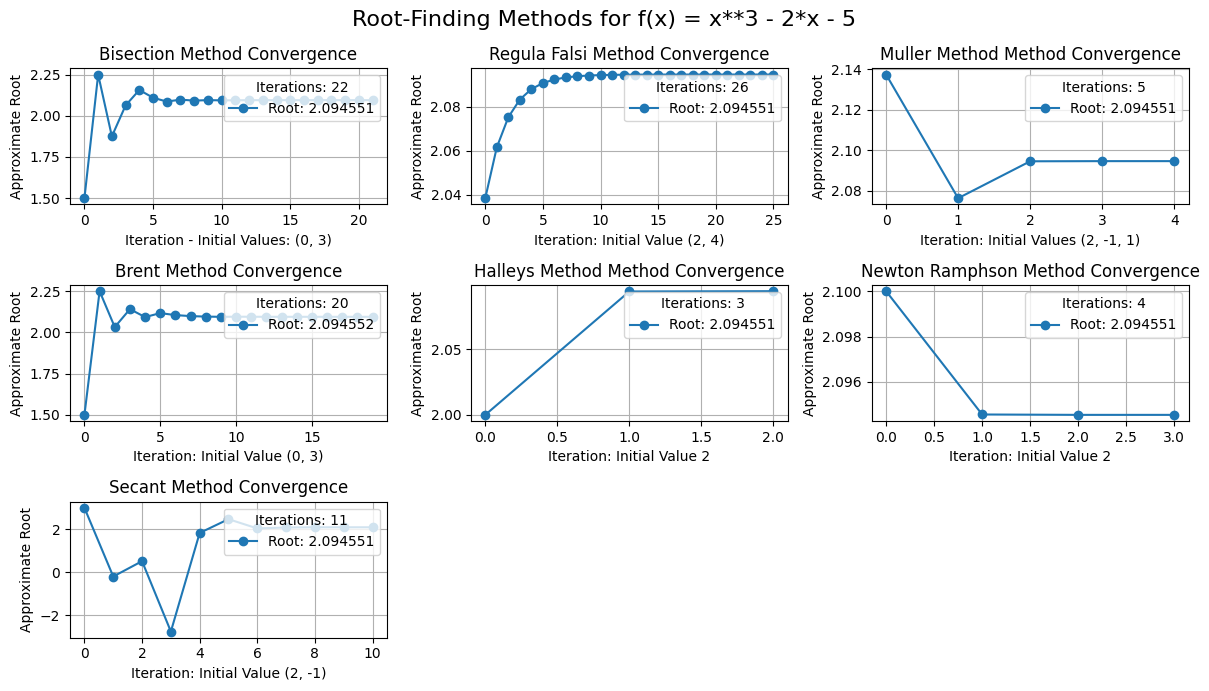

In [25]:
print(display(function_input))
plot()